<a href="https://colab.research.google.com/github/sumanrbt/SP-Cup-2020/blob/master/LSTM_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/SP CUP 2020/SP Cup"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The two folders folders_norm and forlders_abnorm contain the paths to the 6 normal imu data and 6 abnormal imu data.

In [0]:
ls "/content/drive/My Drive/SP CUP 2020/SP Cup"

 01_Initial_dataset_with_no_abnormalities/
 02_Initial_dataset_with_abnormalities/
'03_Dataset with 5 normal experiments_17Jan2020'/
'04_Dataset with 5 abnormal experiments_17Jan2020'/


In [0]:
folders_norm=["/content/drive/My Drive/SP CUP 2020/SP Cup/01_Initial_dataset_with_no_abnormalities/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-12/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-49/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-33-26/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-08/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-43/_slash_mavros_slash_imu_slash_data.csv"]
folders_abnorm=["/content/drive/My Drive/SP CUP 2020/SP Cup/02_Initial_dataset_with_abnormalities/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-35-27/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-36-03/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-36-43/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-37-25/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-38-07/_slash_mavros_slash_imu_slash_data.csv"]

### IMPORTS

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Normal IMU data

In [0]:
num=0
data_dir = folders_norm[num]
df=pd.read_csv(data_dir)
linear_acceleration = pd.DataFrame()
for i in range(len(df)):
    x=df["x.2"][i]
    y=df["y.2"][i]
    z=df["z.2"][i]
    la=np.array([x,y,z])
    la_df=pd.DataFrame(la.reshape(1,3))
    la_df.index=[str(i)]
    linear_acceleration=linear_acceleration.append(la_df)
    
linear_acceleration.columns=["X","Y","Z"]

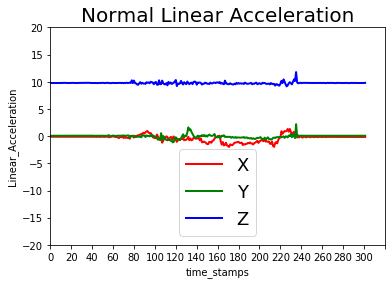

In [0]:
#plt.figure(figsize=(14,6))
plt.plot(linear_acceleration["X"],label="X",linewidth=2,color="red")
plt.plot(linear_acceleration["Y"],label="Y",linewidth=2, color="green")
plt.plot(linear_acceleration["Z"],label="Z",linewidth=2, color="blue")
plt.xlim=(0,340)
plt.axis([0,len(linear_acceleration),-20,20])
plt.legend(loc='lower center',fontsize=18)
plt.xticks(np.arange(0,340 , step=20))
plt.title("Normal Linear Acceleration",fontsize=20)
#plt.axvspan(0,60,facecolor='r', alpha=0.5)
plt.ylabel("Linear_Acceleration")
plt.xlabel("time_stamps")
plt.savefig("Linear_acceleration_normal.png")
#plt.show()

## Abnormal IMU data

In [0]:
numb=0
data_dir_ab = folders_abnorm[numb]
df_ab=pd.read_csv(data_dir_ab)
linear_acceleration_ab = pd.DataFrame()
for i in range(len(linear_acceleration),len(linear_acceleration)+len(df_ab)):
    x=df_ab["x.2"][i-len(linear_acceleration)]
    y=df_ab["y.2"][i-len(linear_acceleration)]
    z=df_ab["z.2"][i-len(linear_acceleration)]
    la=np.array([x,y,z])
    la_df=pd.DataFrame(la.reshape(1,3))
    la_df.index=[str(i)]
    linear_acceleration_ab=linear_acceleration_ab.append(la_df)
    
linear_acceleration_ab.columns=["X","Y","Z"]

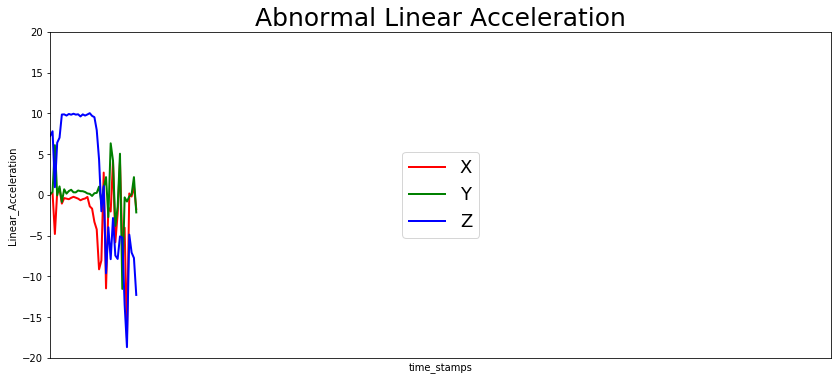

In [0]:
plt.figure(figsize=(14,6))
plt.plot(linear_acceleration_ab["X"],label="X",linewidth=2,color="red")
plt.plot(linear_acceleration_ab["Y"],label="Y",linewidth=2, color="green")
plt.plot(linear_acceleration_ab["Z"],label="Z",linewidth=2, color="blue")
plt.xlim=(0,340)
plt.axis([0,len(linear_acceleration_ab),-20,20])
plt.legend(loc='center',fontsize=18)
plt.xticks(np.arange(0,340 , step=16))
plt.title("Abnormal Linear Acceleration",fontsize=25)
plt.xticks([])
plt.ylabel("Linear_Acceleration")
plt.xlabel("time_stamps")
plt.savefig("Linear_acceleration_abnormal.png")
plt.show()

## Combining the two dataframes

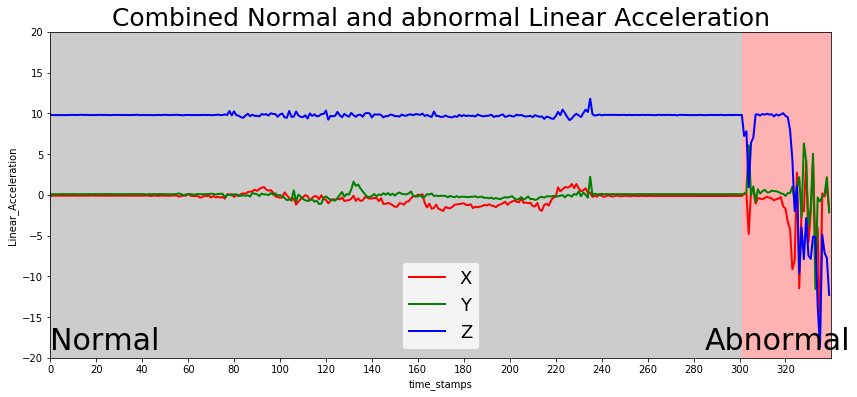

In [0]:
frames=[linear_acceleration,linear_acceleration_ab]
result=pd.concat(frames)

plt.figure(figsize=(14,6))
plt.plot(result["X"],label="X",linewidth=2,color="red")
plt.plot(result["Y"],label="Y",linewidth=2, color="green")
plt.plot(result["Z"],label="Z",linewidth=2, color="blue")
plt.xlim=(0,340)
plt.axis([0,len(result),-20,20])
plt.legend(loc='lower center',fontsize=18)
plt.xticks(np.arange(0,len(result) , step=20))
plt.title("Combined Normal and abnormal Linear Acceleration",fontsize=25)
plt.axvspan(0,301,facecolor='grey', alpha=0.4,label="normal")
plt.text(0,-19,"Normal",fontsize=30)
plt.text(285,-19,"Abnormal",fontsize=30)
plt.axvspan(301,340,facecolor='red', alpha=0.3,label="abnormal")
plt.ylabel("Linear_Acceleration")
plt.xlabel("time_stamps")
plt.savefig("Linear_acceleration_combined.png")
plt.show()

### Data Preprocessing

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [0]:
linear_acceleration

,X,Y,Z
0,-0.107873,0.088260,9.806650
1,-0.107873,0.068647,9.777230
2,-0.107873,0.078453,9.777230
3,-0.117680,0.068647,9.787037
4,-0.098067,0.078453,9.777230
...,...,...,...
297,-0.137293,0.088260,9.777230
298,-0.137293,0.068647,9.796843
299,-0.147100,0.078453,9.787037
300,-0.147100,0.078453,9.787037


In [0]:
scaler=scaler.fit(linear_acceleration)
d=scaler.transform(linear_acceleration)
ab=scaler.transform(linear_acceleration_ab)

In [0]:
linear_acceleration_s=pd.DataFrame(d,columns=["X","Y","Z"])
linear_acceleration_s_ab=pd.DataFrame(ab,columns=["X","Y","Z"])

In [0]:
linear_acceleration_s.head()

,X,Y,Z
0,0.566766,0.366569,0.246269
1,0.566766,0.360704,0.235075
2,0.566766,0.363636,0.235075
3,0.563798,0.360704,0.238806
4,0.569733,0.363636,0.235075


In [0]:
z=np.array(linear_acceleration_s)
y=np.array(linear_acceleration_s_ab)

In [0]:
x_train=np.reshape(z,(len(np.array(linear_acceleration_s)),1,3))
x_ab=np.reshape(y,(len(np.array(linear_acceleration_s_ab)),1,3))

### LSTM Auto_Encoder Building

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import load_model

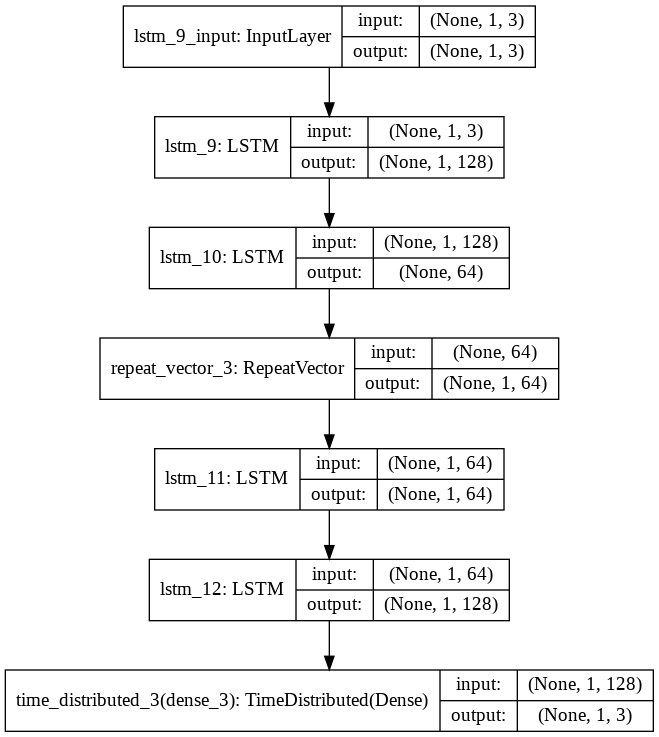

In [0]:
time_step=1
n_features=3
model=Sequential()
model.add(LSTM(128,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=True))
model.add(LSTM(64,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=False))
model.add(RepeatVector(1))
model.add(LSTM(64,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=True))
model.add(LSTM(128,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='LSTM_autoencoder_model.png', show_shapes=True,show_layer_names=True)

In [0]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,x_train,epochs=200)

(302, 1, 3)


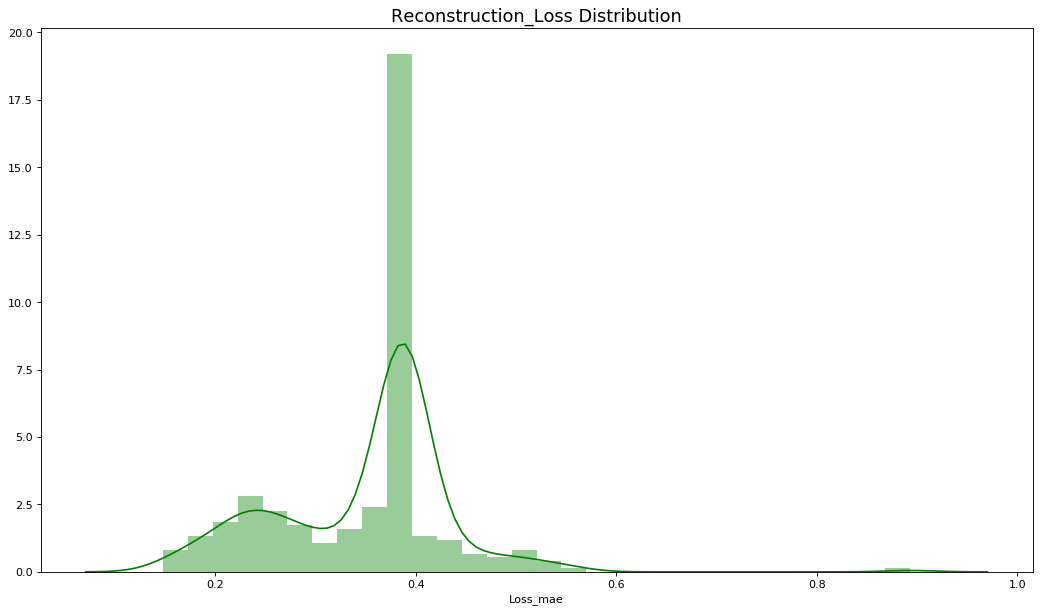

In [0]:
import seaborn as sns
x_pred = model.predict(x_train)
x_pred = x_pred.reshape(x_pred.shape[0], x_pred.shape[2])
x_pred = pd.DataFrame(x_pred, columns=linear_acceleration_s.columns)
x_pred.index = linear_acceleration_s.index

scored = pd.DataFrame(index=linear_acceleration_s.index)
X_train = x_train.reshape(x_train.shape[0], x_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred-X_train), axis = 1)

plt.figure(figsize=(16,9), dpi=80)
#plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Reconstruction_Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins =30, kde= True, color = 'green');

print(x_train.shape)

In [0]:
model.save("linear_acceleration_abnormality_model.hdf5")

0.0013926423941198844


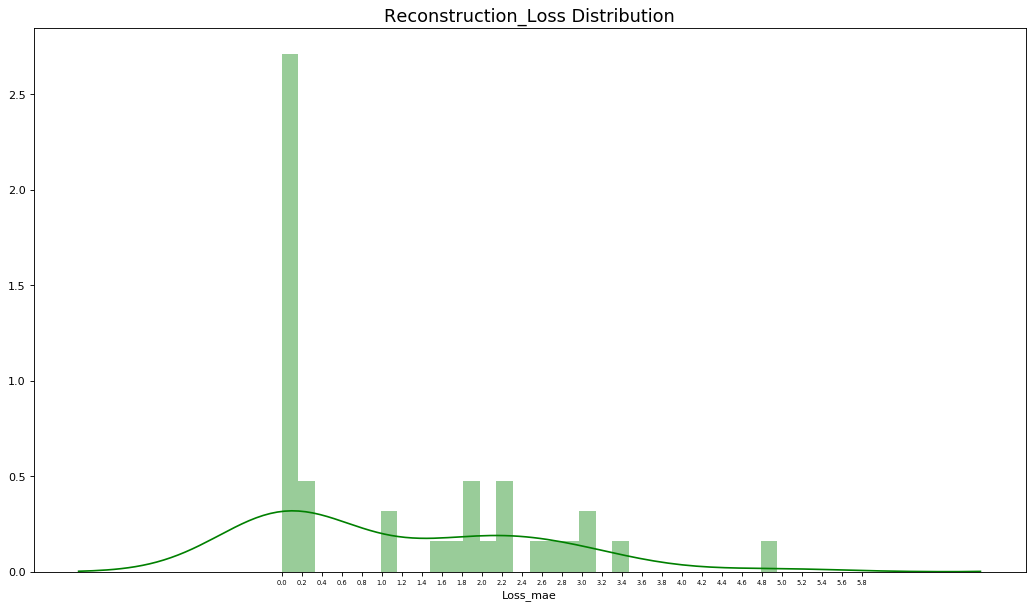

In [0]:
model=load_model("linear_acceleration_abnormality_model.hdf5")
x_ab=np.reshape(y,(len(np.array(linear_acceleration_s_ab)),1,3))
x_pred_ab = model.predict(x_ab)
x_pred_ab = x_pred_ab.reshape(x_pred_ab.shape[0], x_pred_ab.shape[2])
x_pred_ab= pd.DataFrame(x_pred_ab, columns=linear_acceleration_s_ab.columns)
x_pred_ab.index = linear_acceleration_s_ab.index
x_pred_ab.head()
scored_ab = pd.DataFrame(index=linear_acceleration_s_ab.index)
x_ab = x_ab.reshape(x_ab.shape[0], x_ab.shape[2])
scored_ab['Loss_mae'] = np.mean(np.abs(x_pred_ab-x_ab), axis = 1)

plt.figure(figsize=(16,9), dpi=80)
plt.xticks(np.arange(0, 6, step=0.2),fontsize=6)
plt.title('Reconstruction_Loss Distribution', fontsize=16)
sns.distplot(scored_ab['Loss_mae'], bins =30, kde= True, color = 'green');
print(min(scored_ab["Loss_mae"]))


## Best Threshold=0.175

In [0]:
## Checking the final abnormality detection in real-time

In [0]:
result.head()

,X,Y,Z
0,-0.107873,0.088260,9.806650
1,-0.107873,0.068647,9.777230
2,-0.107873,0.078453,9.777230
3,-0.117680,0.068647,9.787037
4,-0.098067,0.078453,9.777230


In [0]:
import time
tam=0
for index in range(340):   
    #index=0
    start=time.time()
    inp=np.array(result.iloc[index,:])
    h=scaler.transform(inp.reshape(1,3))
    pred=model.predict(h.reshape(1,1,3))
    #model.evaluate(h.reshape(1,1,3),h.reshape(1,1,3))
    error=np.mean(np.abs((pred.reshape(pred.shape[1],pred.shape[2]))-h))
    print(error)
    if (error>0.175):
        print(index,"Abnormal")
         
    else:
        print(index,"Normal")
    end=time.time()
    g=end-start
    if g>tam:
        tam=g
print(tam)

0.0005291197947819107
0 Normal
0.0002810270370723715
1 Normal
0.00035581999992506663
2 Normal
0.00032613838530271
3 Normal
0.0003370797778459537
4 Normal
0.00038182853115390863
5 Normal
0.00041200188409566224
6 Normal
0.00038182853115390863
7 Normal
0.00043104509645238337
8 Normal
0.0003273170865777386
9 Normal
0.0005144325718010415
10 Normal
0.00038182853115390863
11 Normal
0.00038182853115390863
12 Normal
0.0006576611404019254
13 Normal
0.00040456874102741863
14 Normal
0.0003617174022449617
15 Normal
0.0003457260255977183
16 Normal
0.00035581999992506663
17 Normal
0.00031891573399966955
18 Normal
0.00043785643665883445
19 Normal
0.00046049730545771883
20 Normal
0.0003273170865777386
21 Normal
0.00040281895638483167
22 Normal
0.0004582705558453896
23 Normal
0.00042664185616022216
24 Normal
0.0004582705558453896
25 Normal
0.00045690207970163393
26 Normal
0.00038309663939610034
27 Normal
0.00040456874102741863
28 Normal
0.0003617174022449617
29 Normal
0.00038182853115390863
30 Normal
0.